# DETE/TAFE Employee Satisfaction

In this project, I will be using exit surveys from employees of the [Department of Education, Training and Employment](https://en.wikipedia.org/wiki/Department_of_Education_(Queensland)) (DETE) and the [Technical and Further Education](https://en.wikipedia.org/wiki/TAFE_Queensland) (TAFE) institute in Queensland, Australia. I will attempt to answer the following questions:

* Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been there longer?
* Are younger employees resigning due to some kind of dissatisfaction? What about older employees?

The DETE exit survey data can be found [here](https://data.gov.au/dataset/ds-qld-fe96ff30-d157-4a81-851d-215f2a0fe26d/details?q=exit%20survey).

*Note: The original TAFE exit survey data is no longer available.*

In [1]:
import pandas as pd
import numpy as np

dete_survey = pd.read_csv('dete_survey.csv')
tafe_survey = pd.read_csv('tafe_survey.csv')

In [2]:
dete_survey.head()

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,...,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984,2004,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,Not Stated,Not Stated,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011,2011,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,N,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005,2006,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,A,N,A,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970,1989,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,N,A,M,Female,61 or older,NaN,NaN,NaN,NaN,NaN


In [3]:
dete_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 56 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   ID                                   822 non-null    int64 
 1   SeparationType                       822 non-null    object
 2   Cease Date                           822 non-null    object
 3   DETE Start Date                      822 non-null    object
 4   Role Start Date                      822 non-null    object
 5   Position                             817 non-null    object
 6   Classification                       455 non-null    object
 7   Region                               822 non-null    object
 8   Business Unit                        126 non-null    object
 9   Employment Status                    817 non-null    object
 10  Career move to public sector         822 non-null    bool  
 11  Career move to private sector        822 non-

In [4]:
tafe_survey.head()

,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Workplace. Topic:Does your workplace promote a work culture free from all forms of unlawful discrimination?,Workplace. Topic:Does your workplace promote and practice the principles of employment equity?,Workplace. Topic:Does your workplace value the diversity of its employees?,Workplace. Topic:Would you recommend the Institute as an employer to others?,Gender. What is your Gender?,CurrentAge. Current Age,Employment Type. Employment Type,Classification. Classification,LengthofServiceOverall. Overall Length of Service at Institute (in years),LengthofServiceCurrent. Length of Service at current workplace (in years)
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,Yes,Yes,Yes,Yes,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
2,6.341388e+17,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,Yes,Yes,Yes,Yes,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4


In [5]:
tafe_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 72 columns):
 #   Column                                                                                                                                                         Non-Null Count  Dtype  
---  ------                                                                                                                                                         --------------  -----  
 0   Record ID                                                                                                                                                      702 non-null    float64
 1   Institute                                                                                                                                                      702 non-null    object 
 2   WorkArea                                                                                                                                  

A few basic observations from the above datasets:
* `dete_survey` consists of 822 entries organized into 56 columns
* `tafe_survey` consists of 702 entries organized into 72 columns
* `dete_survey` contains instances of `'Not Stated'` values instead of standard `NaN` values
* The datasets both have many of the same columns, although with different column names.
* There are multiple columns indicating factors for employee resignation & dissatisfaction.

## Identifying Missing Values & Dropping Unneccesary Columns

To start, I want to change any `'Not Stated'` inputs to standard `NaN` values. Also, I will drop any columns which are not needed for further analysis.

In [6]:
dete_survey = pd.read_csv('dete_survey.csv', na_values='Not Stated')

dete_survey.head()

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,...,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984.0,2004.0,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,NaN,NaN,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011.0,2011.0,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,N,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,A,N,A,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970.0,1989.0,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,N,A,M,Female,61 or older,NaN,NaN,NaN,NaN,NaN


In [7]:
# Removing Unneccessary columns:
dete_survey_updated = dete_survey.drop(dete_survey.columns[28:49], axis=1)
tafe_survey_updated = tafe_survey.drop(tafe_survey.columns[17:66], axis=1)

# Updated Columns:
print(dete_survey_updated.columns)
print('\n')
print(tafe_survey_updated.columns)

Index(['ID', 'SeparationType', 'Cease Date', 'DETE Start Date',
       'Role Start Date', 'Position', 'Classification', 'Region',
       'Business Unit', 'Employment Status', 'Career move to public sector',
       'Career move to private sector', 'Interpersonal conflicts',
       'Job dissatisfaction', 'Dissatisfaction with the department',
       'Physical work environment', 'Lack of recognition',
       'Lack of job security', 'Work location', 'Employment conditions',
       'Maternity/family', 'Relocation', 'Study/Travel', 'Ill Health',
       'Traumatic incident', 'Work life balance', 'Workload',
       'None of the above', 'Gender', 'Age', 'Aboriginal', 'Torres Strait',
       'South Sea', 'Disability', 'NESB'],
      dtype='object')


Index(['Record ID', 'Institute', 'WorkArea', 'CESSATION YEAR',
       'Reason for ceasing employment',
       'Contributing Factors. Career Move - Public Sector ',
       'Contributing Factors. Career Move - Private Sector ',
       'Contributing Fa

## Renaming Columns

Next, I want to standardize the column names for both datasets in order to eventually merge them together.

In [8]:
# cleaning column names:
dete_survey_updated.columns = dete_survey_updated.columns.str.lower().str.strip().str.replace(' ','_')

# updated column names:
dete_survey_updated.columns

Index(['id', 'separationtype', 'cease_date', 'dete_start_date',
       'role_start_date', 'position', 'classification', 'region',
       'business_unit', 'employment_status', 'career_move_to_public_sector',
       'career_move_to_private_sector', 'interpersonal_conflicts',
       'job_dissatisfaction', 'dissatisfaction_with_the_department',
       'physical_work_environment', 'lack_of_recognition',
       'lack_of_job_security', 'work_location', 'employment_conditions',
       'maternity/family', 'relocation', 'study/travel', 'ill_health',
       'traumatic_incident', 'work_life_balance', 'workload',
       'none_of_the_above', 'gender', 'age', 'aboriginal', 'torres_strait',
       'south_sea', 'disability', 'nesb'],
      dtype='object')

In [9]:
# updating columns in tafe to match dete
column_map = {'Record ID': 'id',
              'CESSATION YEAR': 'cease_date',
              'Reason for ceasing employment': 'separationtype',
              'Gender. What is your Gender?': 'gender',
              'CurrentAge. Current Age': 'age',
              'Employment Type. Employment Type': 'employment_status',
              'Classification. Classification': 'position',
              'LengthofServiceOverall. Overall Length of Service at Institute (in years)': 'institute_service',
              'LengthofServiceCurrent. Length of Service at current workplace (in years)': 'role_service'
             }
tafe_survey_updated = tafe_survey_updated.rename(column_map, axis=1)

# updated column names
tafe_survey_updated.columns

Index(['id', 'Institute', 'WorkArea', 'cease_date', 'separationtype',
       'Contributing Factors. Career Move - Public Sector ',
       'Contributing Factors. Career Move - Private Sector ',
       'Contributing Factors. Career Move - Self-employment',
       'Contributing Factors. Ill Health',
       'Contributing Factors. Maternity/Family',
       'Contributing Factors. Dissatisfaction',
       'Contributing Factors. Job Dissatisfaction',
       'Contributing Factors. Interpersonal Conflict',
       'Contributing Factors. Study', 'Contributing Factors. Travel',
       'Contributing Factors. Other', 'Contributing Factors. NONE', 'gender',
       'age', 'employment_status', 'position', 'institute_service',
       'role_service'],
      dtype='object')

## Filtering the Data

Recalling again the initial questions for this project:

* Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been there longer?
* Are younger employees resigning due to some kind of dissatisfaction? What about older employees?

For each of these questions, the population of interest consists of employees who resigned. Thus, we should be filtering the data for separation types relating to resignation.

In [10]:
# DETE separationtype values
dete_survey_updated['separationtype'].value_counts()

Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: separationtype, dtype: int64

In [11]:
# TAFE separationtype values
tafe_survey_updated['separationtype'].value_counts()

Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
Name: separationtype, dtype: int64

Note that `dete_survey_updated` contains three different `separationtype` values containing the string `'Resignation'`. These will all be included moving forward.

In [12]:
#creating new dataframes w/ only resignation separation types
dete_resignations = dete_survey_updated.copy()[dete_survey_updated['separationtype'].str.contains('Resignation')]
tafe_resignations = tafe_survey_updated.copy()[tafe_survey_updated['separationtype'] == 'Resignation']

## Verifying the Data

Below, I will clean the `cease_date` and `dete_start_date` columns using the following criteria:

* Since `cease_date` is the last year of the person's employment and the `dete_start_date` is the person's first year of employment, it wouldn't make sense to have rows where `dete_start_date` occurs after `cease_date`.
* It would not make sense to have dates which occurred after the survey's creation (2014).
* Given that most people in this field start working in their 20s, it's also unlikely that the `dete_start_date` was before the year 1940.

`dete_resignations`:

In [13]:
dete_resignations['cease_date'].value_counts()

2012       126
2013        74
01/2014     22
12/2013     17
06/2013     14
09/2013     11
11/2013      9
07/2013      9
10/2013      6
08/2013      4
05/2013      2
05/2012      2
07/2006      1
2010         1
09/2010      1
07/2012      1
Name: cease_date, dtype: int64

In [14]:
#extracting year and converting to float
dete_resignations['cease_date'] = dete_resignations['cease_date'].str.split('/').str[-1].astype('float')

dete_resignations['cease_date'].value_counts().sort_index()

2006.0      1
2010.0      2
2012.0    129
2013.0    146
2014.0     22
Name: cease_date, dtype: int64

In [15]:
dete_resignations['dete_start_date'].value_counts().sort_index()

1963.0     1
1971.0     1
1972.0     1
1973.0     1
1974.0     2
1975.0     1
1976.0     2
1977.0     1
1980.0     5
1982.0     1
1983.0     2
1984.0     1
1985.0     3
1986.0     3
1987.0     1
1988.0     4
1989.0     4
1990.0     5
1991.0     4
1992.0     6
1993.0     5
1994.0     6
1995.0     4
1996.0     6
1997.0     5
1998.0     6
1999.0     8
2000.0     9
2001.0     3
2002.0     6
2003.0     6
2004.0    14
2005.0    15
2006.0    13
2007.0    21
2008.0    22
2009.0    13
2010.0    17
2011.0    24
2012.0    21
2013.0    10
Name: dete_start_date, dtype: int64

In [16]:
#checking for occurrences of dete_start_date > cease_date
dete_resignations[dete_resignations['dete_start_date'] > dete_resignations['cease_date']]

,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,...,work_life_balance,workload,none_of_the_above,gender,age,aboriginal,torres_strait,south_sea,disability,nesb


`tafe_resignations`:

In [17]:
tafe_resignations['cease_date'].value_counts().sort_index()

2009.0      2
2010.0     68
2011.0    116
2012.0     94
2013.0     55
Name: cease_date, dtype: int64

---
Findings:

In [18]:
print('cease_date value counts:')
print("dete",' '*6,"tafe")
print("\n".join("{:.0f}:{:4d} | {:.0f}:{:4d}".format(a,b,c,d) for a,b,c,d in zip(
    dete_resignations['cease_date'].value_counts().sort_index().index,
    dete_resignations['cease_date'].value_counts().sort_index(),
    tafe_resignations['cease_date'].value_counts().sort_index().index,
    tafe_resignations['cease_date'].value_counts().sort_index())))

cease_date value counts:
dete        tafe
2006:   1 | 2009:   2
2010:   2 | 2010:  68
2012: 129 | 2011: 116
2013: 146 | 2012:  94
2014:  22 | 2013:  55


From the above findings, we can see that the `cease_date` values from `dete_resignations` and `tafe_resignations` are not quite alligned in terms of time span. However, there are no major issues with these years.

## Identifying Years of Service & Employee Dissatisfaction

My first goal for this project is to answer the following:

* Are employees who have only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been at the job longer?

Answering these questions requires a column in both dataframes which reflects an employees years of service.

The `tafe_resignations` dataframe already contains the column `institute_service`. This column will need to be added to the `dete_resignations` dataframe.

In [19]:
#subtracting dete_start_date from cease_date
dete_resignations['institute_service'] = dete_resignations['cease_date'] - dete_resignations['dete_start_date']

dete_resignations['institute_service'].head()

3      7.0
5     18.0
8      3.0
9     15.0
11     3.0
Name: institute_service, dtype: float64

Answering these questions also requires identifying employees who resigned due to job dissatisfaction.

Below are the columns I will use to identify employees as being dissatisfied:
1. tafe_survey_updated:
    * `Contributing Factors. Dissatisfaction`
    * `Contributing Factors. Job Dissatisfaction`
2. dete_survey_updated:
    * `job_dissatisfaction`
    * `dissatisfaction_with_the_department`
    * `physical_work_environment`
    * `lack_of_recognition`
    * `lack_of_job_security`
    * `work_location`
    * `employment_conditions`
    * `work_life_balance`
    * `workload`
    
If the employee indicated any of the factors above caused them to resign, I'll mark them as `dissatisfied` in a new column.

`tafe_resignations`:

In [20]:
tafe_resignations[['Contributing Factors. Dissatisfaction','Contributing Factors. Job Dissatisfaction']].apply(pd.Series.value_counts)

,Contributing Factors. Dissatisfaction,Contributing Factors. Job Dissatisfaction
-,277.0,270.0
Contributing Factors. Dissatisfaction,55.0,NaN
Job Dissatisfaction,NaN,62.0


In [21]:
#updating necessary columns to True/False values
def update_vals(x):
    if x == '-':
        return False
    elif pd.isnull(x):
        return np.nan
    else:
        return True
    
tafe_resignations_up = tafe_resignations.copy()
    
for col in ['Contributing Factors. Dissatisfaction','Contributing Factors. Job Dissatisfaction']:
    tafe_resignations_up[col] = tafe_resignations_up[col].apply(update_vals)

tafe_resignations_up[['Contributing Factors. Dissatisfaction','Contributing Factors. Job Dissatisfaction']].apply(pd.Series.value_counts)

,Contributing Factors. Dissatisfaction,Contributing Factors. Job Dissatisfaction
False,277,270
True,55,62


In [22]:
#creating 'dissatisfied' column
tafe_resignations_up['dissatisfied'] = tafe_resignations_up[['Contributing Factors. Dissatisfaction','Contributing Factors. Job Dissatisfaction']].any(axis=1,skipna=False)

tafe_resignations_up['dissatisfied'].value_counts(dropna=False)

False    241
True      91
NaN        8
Name: dissatisfied, dtype: int64

`dete_resignations`:

In [23]:
#creating 'dissatisfied' column
dete_resignations_up = dete_resignations.copy()

dete_resignations_up['dissatisfied'] = (
    dete_resignations_up[['job_dissatisfaction','dissatisfaction_with_the_department','physical_work_environment',
                   'lack_of_recognition','lack_of_job_security','work_location',
                   'employment_conditions','work_life_balance','workload']].any(axis=1, skipna=False)
)

dete_resignations_up['dissatisfied'].value_counts(dropna=False)

False    162
True     149
Name: dissatisfied, dtype: int64

## Combining the Data

Before combining, I'll add a column named `institute` to each dataframe in order to easily differentiate where each data point originates from:

In [24]:
#adding 'institute' columns
dete_resignations_up['institute'] = 'DETE'
tafe_resignations_up['institute'] = 'TAFE'

In [25]:
#combining dfs
combined = pd.concat([dete_resignations_up, tafe_resignations_up],ignore_index=True)

#number of non-null values per column
combined.notnull().sum().sort_values()

torres_strait                                            0
south_sea                                                3
aboriginal                                               7
disability                                               8
nesb                                                     9
business_unit                                           32
classification                                         161
region                                                 265
role_start_date                                        271
dete_start_date                                        283
role_service                                           290
none_of_the_above                                      311
work_life_balance                                      311
traumatic_incident                                     311
ill_health                                             311
study/travel                                           311
relocation                                             3

In [26]:
#dropping columns w/ <500 non-null values
combined_updated = combined.copy().dropna(axis=1,thresh=500)

## Cleaning `institute_service` & `age` Columns

The first column I want to clean is the `institute_service` column, which currently contains values such as those below:

In [27]:
combined_updated['institute_service'].value_counts().head(10)

Less than 1 year    73
1-2                 64
3-4                 63
5-6                 33
11-20               26
5.0                 23
1.0                 22
7-10                21
3.0                 20
0.0                 20
Name: institute_service, dtype: int64

Ultimately, I want to convert these values into categories as follows:

* New: Less than 3 years service
* Experienced: 3-6 years service
* Established: 7-10 years service
* Veteran: 11+ years service

*Note: these categories were chosen based on [this article](https://www.businesswire.com/news/home/20171108006002/en/Age-Number-Engage-Employees-Career-Stage), which makes the argument that understanding employee's needs according to career stage instead of age is more effective.*

In [28]:
#extracting years of service from each value in column & converting to float
combined_updated['institute_service'] = combined_updated['institute_service'].astype('str').str.extract(r'(\d+)').astype('float')

#converting years of service to categories
def transform_service(x):
    if pd.isnull(x):
        return np.nan
    elif x < 3:
        return 'New'
    elif 3 <= x <= 6:
        return 'Experienced'
    elif 7 <= x <= 10:
        return 'Established'
    else:
        return 'Veteran'
    
#assigning to new column 'service_cat'
combined_updated['service_cat'] = combined_updated['institute_service'].apply(transform_service)
combined_updated['service_cat'].value_counts()

New            193
Experienced    172
Veteran        136
Established     62
Name: service_cat, dtype: int64

---
Now for the `age` column. Cleaning this column will be necessary to address my second goal:
* Are younger employees resigning due to some kind of dissatisfaction? What about older employees?

In [29]:
combined_updated['age'].value_counts(dropna=False).sort_index()

20 or younger    10
21  25           33
21-25            29
26  30           32
26-30            35
31  35           32
31-35            29
36  40           32
36-40            41
41  45           45
41-45            48
46  50           39
46-50            42
51-55            71
56 or older      29
56-60            26
61 or older      23
NaN              55
Name: age, dtype: int64

Looking at the values in the `age` column, there are two issues that require attention:
1. Some of the categories contain a dash, while others do not.
2. There is a `56 or older` value, as well as `56-60` and `61 or older`.

These values will be made uniform into the following categories:

* 20 or younger
* 21-25
* 26-30
* 31-35
* 36-40
* 41-45
* 46-50
* 51-55
* 56 or older

In [32]:
combined_updated['age'] = combined_updated['age'].str.replace('  ','-')
combined_updated['age'] = combined_updated['age'].str.replace('56-60','56 or older')
combined_updated['age'] = combined_updated['age'].str.replace('61 or older','56 or older')

combined_updated['age'].value_counts().sort_index()

20 or younger    10
21-25            62
26-30            67
31-35            61
36-40            73
41-45            93
46-50            81
51-55            71
56 or older      78
Name: age, dtype: int64

## Replacing Missing Values

Let's have a look at the values in the previously created `dissatisfied` column:

In [33]:
combined_updated['dissatisfied'].value_counts(dropna=False)

False    403
True     240
NaN        8
Name: dissatisfied, dtype: int64

There are eight missing values in this column (about 1% of rows). To deal with these missing values, I will replace them with the value that occurs most frequently in the column (in this case, `False`). This is a common and effective method for dealing with missing values in categorical data.

In [34]:
combined_updated['dissatisfied'] = combined_updated['dissatisfied'].fillna(False)

combined_updated['dissatisfied'].value_counts(dropna=False)

False    411
True     240
Name: dissatisfied, dtype: int64

## Initial Analysis

Again, the goal of this project is to answer the following questions:

* Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been there longer?
* Are younger employees resigning due to some kind of dissatisfaction? What about older employees?


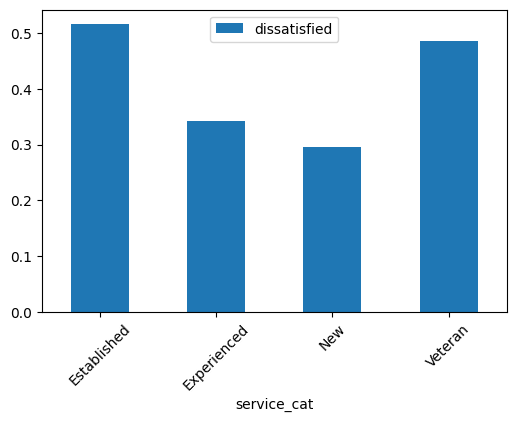

In [40]:
%matplotlib inline

combined_updated.pivot_table(index='service_cat', values='dissatisfied').plot(kind='bar',rot=45)

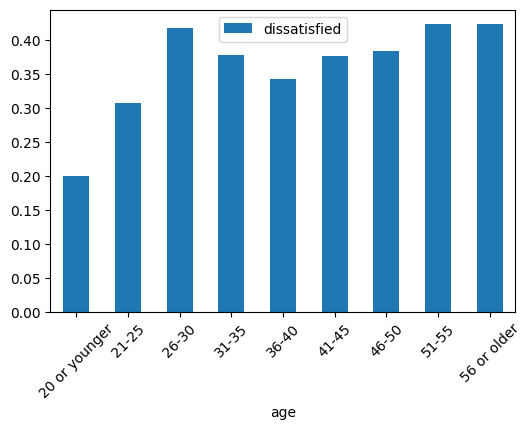

In [43]:
combined_updated.pivot_table(index='age', values='dissatisfied').plot(kind='bar',rot=45)

From the initial analysis above, it seems that employees who are more established (7+ years of service) are more likely to resign due to job dissatisfaction than those who worked for a short period of time. <br>
The relationship between employee age and dissatisfaction is less apparent. The above bar graph peaks twice: once at ages 26-30, and again at 51-55. In other words, once for younger employees, and again for older employees. Since there is no obvious trend toward younger or older employees, I would conclude that age is not the best indicator for identifying job dissatisfaction in this dataset.